Read the dataset:

In [59]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

PATH = 'admissions_releases_states.csv'
DATASET_SIZE = 10000

dataset = pd.read_csv(PATH, index_col=None)
dataset = dataset.head(DATASET_SIZE)

print(dataset.to_string())

            date  admissions_total  admissions_white  admissions_black  admissions_hispanic  admissions_amerind  admissions_asian  admissions_other  releases_total  releases_white  releases_black  releases_hispanic  releases_amerind  releases_asian  releases_other          state
0     2015-02-01              1583               600               193                633.0               130.0               6.0              21.0            1649             653             194              688.0              85.0             7.0            22.0        Arizona
1     2015-03-01              1580               615               189                640.0               114.0               3.0              19.0            1559             644             169              610.0             111.0             6.0            19.0        Arizona
2     2015-04-01              1779               706               235                701.0               115.0               4.0              18.0            1

График зависимости цены закрытия от объема торгов

c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


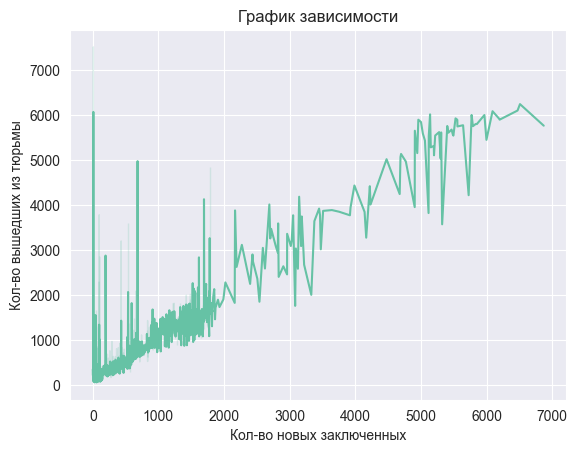

In [60]:
sns.set_style('darkgrid')
sns.set_palette('Set2')

sns.lineplot(
    x=dataset['admissions_total'],
    y=dataset['releases_total']
)

plt.title('График зависимости')
plt.xlabel('Кол-во новых заключенных')
plt.ylabel('Кол-во вышедших из тюрьмы')

plt.show()

In [62]:
x = np.array(dataset['admissions_total']).reshape(-1, 1)
y = np.array(dataset['releases_total']).reshape(-1, 1)

DEGREE = 2

regression = make_pipeline(PolynomialFeatures(DEGREE), LinearRegression())
regression.fit(x, y)
predictions = regression.predict(x)
mean_squared_error = np.mean((predictions - np.array(y)) ** 2)
print(f'Среднеквадратическая ошибка = {mean_squared_error}')

Среднеквадратическая ошибка = 149769.87940380696


c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\P

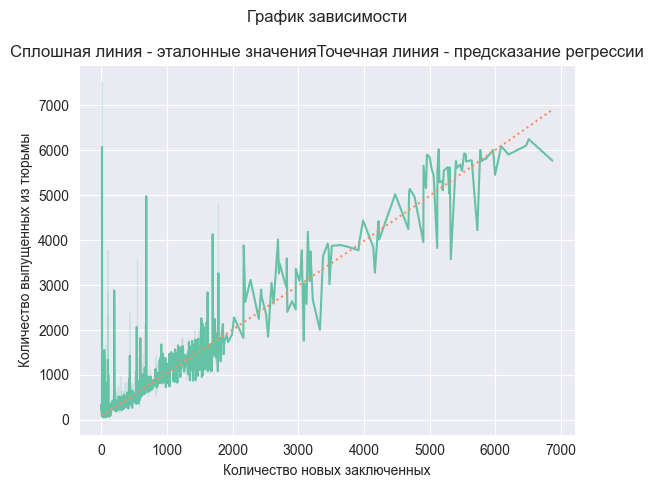

In [65]:
sns.lineplot(
    x=dataset["admissions_total"],
    y=dataset["releases_total"],
    linestyle="solid"
)

sns.lineplot(
    x=dataset["admissions_total"],
    y=predictions.reshape(-1),
    linestyle="dotted"
)

plt.title(
    "График зависимости\n\n"
    "Сплошная линия - эталонные значения"
    "Точечная линия - предсказание регрессии"
)

plt.xlabel("Количество новых заключенных")
plt.ylabel("Количество выпущенных из тюрьмы")
plt.show()


In [67]:
x_parameters = np.append(
    regression['linearregression'].intercept_[0],
    regression['linearregression'].coef_[0][1:]
)

print(f'y = {x_parameters[0]} + {x_parameters[1]}x + {x_parameters[2]}x^2')

y = 89.0725583499891 + 0.9471082847473855x + 6.465521808805616e-06x^2
